# Clustering Assignment

---

**Question 1: What is the difference between K-Means and Hierarchical Clustering? Provide a use case for each.**

->

**Difference between K-Means and Hierarchical Clustering**

1. **Approach**
- K-Means: Partitioning method – divides data into K predefined clusters by minimizing distance from cluster centroids.
- Hierarchical: Builds a tree-like structure (dendrogram) by iteratively merging or splitting clusters.

2. **Number of Clusters**
- K-Means: Must be given in advance.
- Hierarchical: Not required initially; can choose later by cutting the dendrogram.

3. **Cluster Shape**
- K-Means: Works well for spherical / equally sized clusters.
- Hierarchical: Can capture nested or irregular-shaped clusters.

4. **Scalability**
- K-Means: Very fast, suitable for large datasets.
- Hierarchical: Computationally heavy (O(n²)), suitable for small/medium datasets.
---
**Use Cases**

- K-Means:
Market segmentation → Grouping retail customers based on income and spending score.

- Hierarchical Clustering:
Gene expression analysis → Finding similarity and hierarchical relationships among genes or species.
---

**Question 2: Explain the purpose of the Silhouette Score in evaluating clustering algorithms.**

->
- The Silhouette Score is a metric used to evaluate the quality of clusters formed by a clustering algorithm.
- It measures how well each data point fits within its assigned cluster compared to other clusters.
---
**How it Works:**

For each data point i:
- a(i): Average distance of i to all other points in the same cluster (intra-cluster distance).
- b(i): Average distance of i to points in the nearest different cluster (inter-cluster distance).

The silhouette value for a point i is:
$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$
---


**Question 3: What are the core parameters of DBSCAN, and how do they influence the clustering process?**

->

### Core Parameters:

1. **eps (ε – Epsilon radius)**  
   - Defines the neighborhood radius around a data point.  
   - Two points are considered neighbors if the distance between them is ≤ ε.  
   - **Influence:**  
     - Small ε → Many small clusters, more points marked as noise.  
     - Large ε → Fewer, larger clusters (may merge distinct clusters).

---

2. **minPts (Minimum Points)**  
   - Minimum number of points required within ε-neighborhood for a point to be a core point.  
   - **Influence:**  
     - Small minPts → More clusters, including small noisy ones.  
     - Large minPts → Stricter density requirement, fewer clusters, more noise.

---

### Effect on Clustering:

- **Core Point:** Has at least `minPts` neighbors within ε.  
- **Border Point:** Fewer than `minPts` neighbors, but lies within ε of a core point.  
- **Noise Point:** Not a core point, and not within ε of any core point.  

Thus, `eps` controls the **size of the neighborhood**, while `minPts` controls the **density threshold** for forming clusters.

---


**Question 4: Why is feature scaling important when applying clustering algorithms like K-Means and DBSCAN?**

->

**Importance of Feature Scaling in Clustering (K-Means, DBSCAN)**

- **Feature scaling** ensures that all features contribute **equally** to the distance calculation.  
- Since clustering algorithms like **K-Means** and **DBSCAN** rely on distance metrics (e.g., Euclidean distance), unscaled features can distort results.

---

### Why Scaling is Important:

1. **Distance Sensitivity**  
   - K-Means and DBSCAN use distances to form clusters.  
   - If one feature has a larger numeric range, it will dominate the distance measure.  
   - Example: "Age (20–60)" vs. "Income (10,000–100,000)" → Income will overshadow Age.

2. **Fair Contribution of Features**  
   - Scaling (e.g., Standardization or Min-Max normalization) ensures all features are on a comparable scale.  
   - Each feature influences clustering fairly.

3. **Cluster Shape and Density**  
   - In DBSCAN, ε (eps) depends on distances. If features are not scaled, choosing ε becomes unreliable.  
   - In K-Means, centroids may get biased toward features with larger ranges.

---

### Example:

Without scaling:  
- Distance between points mainly reflects "Income," ignoring "Age."  
- Clusters may form incorrectly.

With scaling:  
- Both Age and Income contribute proportionally.  
- Clusters represent true patterns in the data.

---



**Question 5: What is the Elbow Method in K-Means clustering and how does it help determine the optimal number of clusters?**

->

- The Elbow Method is a technique to determine the optimal number of clusters (K) in K-Means clustering.
---
### How It Works:
1. Run K-Means clustering for different values of K (e.g., K = 1 to 10).  
2. For each K, compute the **WCSS (Within-Cluster Sum of Squares)**, also called inertia:  
   - WCSS measures how tightly points are grouped within each cluster.  
3. Plot **K (x-axis)** vs **WCSS (y-axis)**.  
4. The curve will show a sharp drop at first, then start to flatten.  

---

### The "Elbow Point":
- The point on the curve where the rate of decrease in WCSS **slows down sharply** resembles an **elbow**.  
- This point indicates the optimal number of clusters because:  
  - Before the elbow → Adding clusters reduces WCSS significantly (better grouping).  
  - After the elbow → Adding clusters does not give much improvement.
---


**Question 6: Generate synthetic data using make_blobs(n_samples=300, centers=4), apply KMeans clustering, and visualize the results with cluster centers.**


In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X,y = make_blobs(n_samples=300, centers=4, random_state=1)

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
kmeans = KMeans(n_clusters=4, random_state=1)
y_kmeans = kmeans.fit_predict(X)

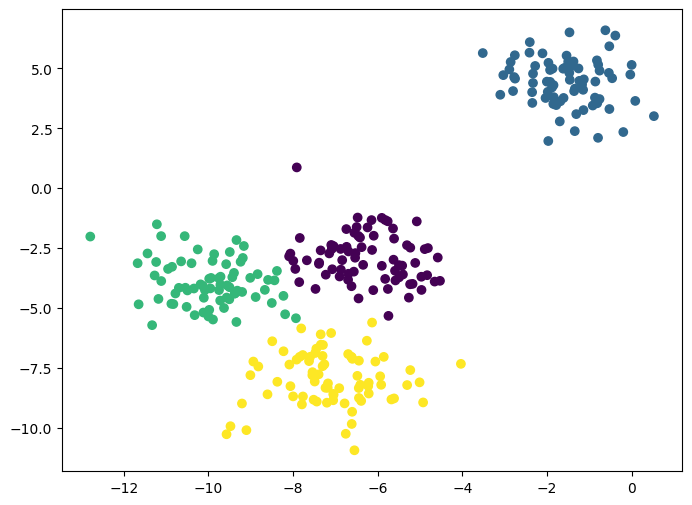

In [5]:
plt.figure(figsize = (8,6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')

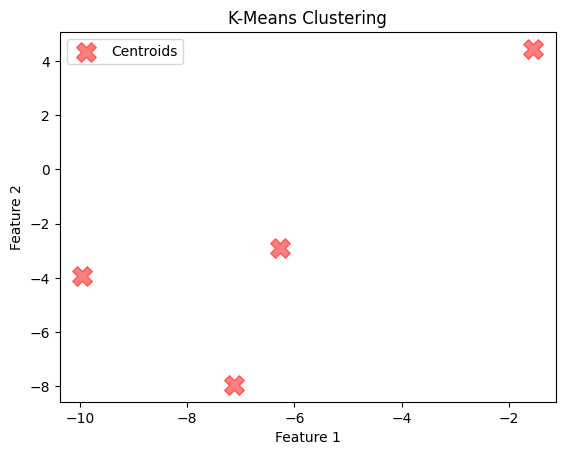

In [6]:
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5, marker='X', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

**Question 7: Load the Wine dataset, apply StandardScaler , and then train a DBSCAN model. Print the number of clusters found (excluding noise).**

In [7]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [8]:
data = load_wine()
X = data.data

In [9]:
scaler = StandardScaler()

In [10]:
X_scaled = scaler.fit_transform(X)

In [11]:
dbscan = DBSCAN(eps=2, min_samples=5)
dbscan.fit_predict(X_scaled)
labels = dbscan.labels_

In [12]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters)

5


**Question 8: Generate moon-shaped synthetic data using make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in
the plot.**

In [13]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

In [14]:
X,y = make_moons(n_samples=200, noise=0.1)

In [15]:
dbscan = DBSCAN(eps=0.2, min_samples=7)
labels = dbscan.fit_predict(X)

In [16]:
outliers = (labels == -1)
outliers

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False,

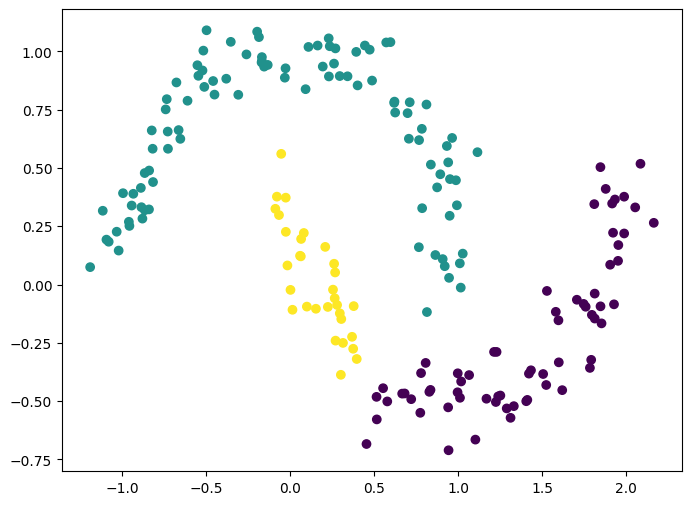

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(X[~outliers, 0], X[~outliers, 1], c=labels[~outliers], cmap='viridis')

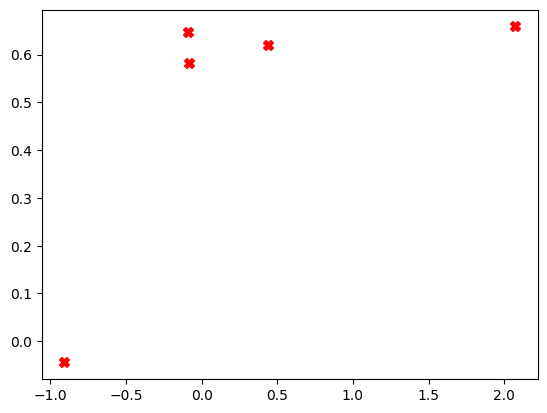

In [18]:
plt.scatter(X[outliers, 0], X[outliers, 1], c='red', marker='X', s=50, label='Outliers')

**Question 9: Load the Wine dataset, reduce it to 2D using PCA, then apply
Agglomerative Clustering and visualize the result in 2D with a scatter plot.**

In [19]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

In [20]:
data = load_wine()
x = data.data

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
pca = PCA(n_components=2)
X_pca =pca.fit_transform(X_scaled)

In [23]:
agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(X_pca)

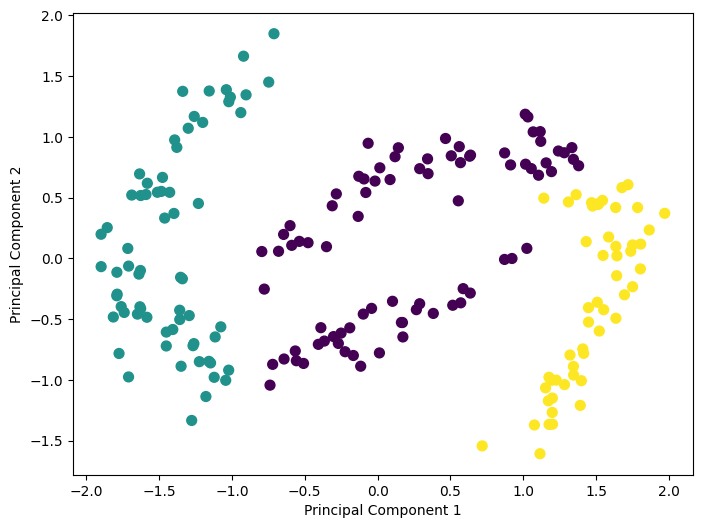

In [24]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="viridis", s=50)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

**Question 10: You are working as a data analyst at an e-commerce company. The marketing team wants to segment customers based on their purchasing behavior to run targeted promotions. The dataset contains customer demographics and their product
purchase history across categories.**

**Describe your real-world data science workflow using clustering:**
- Which clustering algorithm(s) would you use and why?
- How would you preprocess the data (missing values, scaling)?
- How would you determine the number of clusters?
- How would the marketing team benefit from your clustering analysis?

->
### 1. Choice of Clustering Algorithm
- **K-Means:**  
  - Works well for large datasets.  
  - Creates clear, non-overlapping customer segments.  
  - Efficient and interpretable for marketing use cases.  

- **Hierarchical Clustering (optional exploratory step):**  
  - Helps visualize customer relationships using a dendrogram.  
  - Useful to understand potential natural groupings before applying K-Means.  

- **DBSCAN (if needed):**  
  - Can detect outliers (e.g., very high-spending customers).  
  - Handles irregular-shaped clusters.

---
### 2. Data Preprocessing
1. **Handling Missing Values:**  
   - Fill missing demographic info (e.g., Age, Gender) using mean/median (numerical) or mode (categorical).  
   - For purchase history, missing entries → treat as **0 purchases**.  

2. **Encoding Categorical Features:**  
   - Convert Gender, Location, etc., into numeric format using One-Hot Encoding.  

3. **Scaling:**  
   - Apply Standardization or Min-Max scaling since clustering is distance-based.  
   - Ensures that features like "Income" and "Purchase Frequency" contribute equally.  

---

### 3. Determining the Number of Clusters
- **Elbow Method:** Plot WCSS vs. K and select the "elbow" point.  
- **Silhouette Score:** Choose K that maximizes average silhouette value.  

---

### 4. Marketing Benefits of Clustering
- Identify distinct **customer groups** such as:  
  - Price-sensitive customers.  
  - Premium/high-value customers.  
  - Occasional buyers.  
  - Category-focused buyers (e.g., electronics lovers, fashion shoppers).  

- **Benefits for Marketing Team:**  
  - Personalized promotions for each segment.  
  - Better product recommendations.  
  - Efficient allocation of marketing budget.  
  - Increased customer satisfaction and retention.  

---